**Анализ оттока клиентов банка «Метанпром». Сегментация пользователей.**

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import missingno as msno

In [5]:
import math

In [6]:
from scipy import stats 


In [7]:
pip install  phik

     |████████████████████████████████| 686 kB 2.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import phik
from phik import resources, report

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN


In [10]:
import warnings


<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
Ссылка на презентацию

https://cloud.mail.ru/public/E9Jz/ih5rKCdAv

**Анализ оттока клиентов банка «Метанпром». Сегментация пользователей.**

Целью работы является выявление отточных сегментов пользователей. В результате работы необходимо выделить сегменты пользователей, более склонных к оттоку и дать рекомендации по удержанию клиентов

**Этапы работы**

- Загрузка данных и подготовка их к исследованию (поиск дубликатов, обоснование действий при обработке пропусков, кодирование 
                                                признаков, исследование данных на ошибки и аномалии)
- Исследовательский анализ данных (составление портрета типичного пользователя, вычисление оттока по категориям, корелляционный анализ)

- Проверка статистических гипотез

- Сегментация на основе стратегических показателей

- Выводы и предложения

**Исходные данные**
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.
    
Колонки:
    
- USERID — идентификатор пользователя, 
- score — баллы кредитного скоринга, 
- city — город, 
- gender — пол, 
- age — возраст, 
- equity — количество баллов собственности 
- balance — баланс на счёте, 
- products — количество продуктов, которыми пользуется клиент, 
- credit_card — есть ли кредитная карта, 
- last_activity — активный клиент, 
- EST_SALARY — оценочный доход клиента, 
- сhurn — признак оттока.

In [11]:
try:
    data=pd.read_csv(r'C:\Users\user\Documents\data_an\bank_scrooge.csv')
except:
    data=pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
    

In [12]:
def data_info(data):
    """Функция для вывода основной информации о датасете"""
    print('Первые 5 строк в датафрейме:')
    display(data.head())
    print('------------------------------------------------------------------------------------')
    print('Основная информация df.info():')
    data.info()
    print('------------------------------------------------------------------------------------')
    display(pd.DataFrame({'Количество пропущенных значений': data.isna().sum()}))
    print('------------------------------------------------------------------------------------')
    print(f'Количество дубликатов: {data.duplicated().sum()}')
    print('------------------------------------------------------------------------------------')


In [13]:
data_info(data)

Первые 5 строк в датафрейме:


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


------------------------------------------------------------------------------------
Основная информация df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
------------------------------------------------------------------------------------


,Количество пропущенных значений
USERID,0
score,0
city,0
gender,0
age,26
equity,0
balance,2295
products,0
credit_card,0
last_activity,0


------------------------------------------------------------------------------------
Количество дубликатов: 0
------------------------------------------------------------------------------------


In [14]:
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


В рамках первичного просмотра данных явных дубликатов не обнаружено. Пропуски присутствуют в двух столбцах, далее будет 
необходимо проанализировать их возникновение

Приведем данные к соответствующим типам, так как количество лет указано целом числом от 18 до 86, а score от 642 до 1000

In [15]:
data['score']=data['score'].astype(int)
data['age']=data['age'].astype(
    int,
    errors='ignore'
)  


Приведем все столбцы к нижнему регистру

In [16]:
data.columns=[i.lower() for i in data.columns]

Визуализируем наличие пропусков в данных

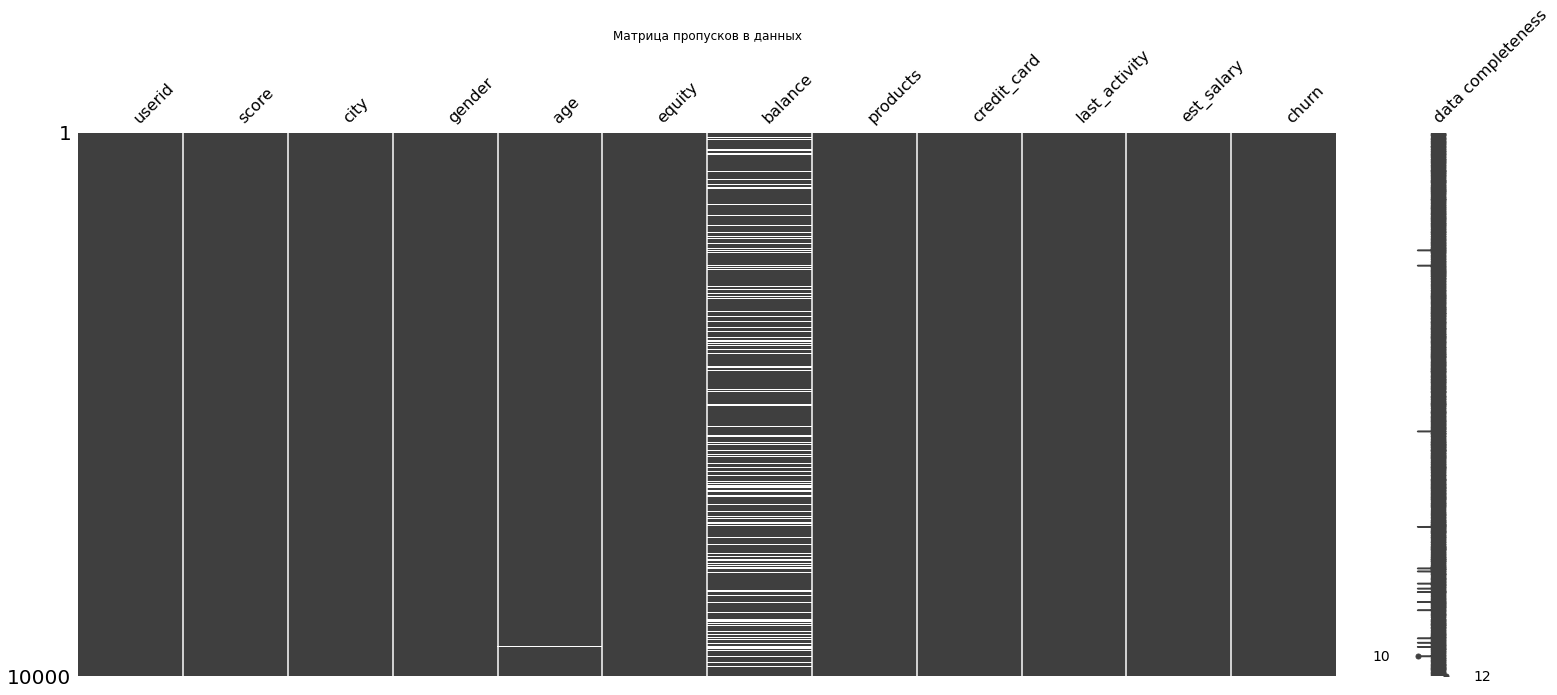

In [17]:
msno.matrix(data,labels=True)
plt.title('Матрица пропусков в данных');

Пропуски в данных не связаны между собой и имеют неоднородную структуру

Исследуем пропуски в поле balance

In [18]:
data[data['balance'].isna()].head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0


Сравним средние показатели всех клиентов и имеющих пропуск в балансе и клиентов с заполненным значением balance

In [19]:
data.query('balance>=0').describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,7705.000000,7705.000000,7695.000000,7705.000000,7.705000e+03,7705.000000,7705.000000,7705.000000,7.705000e+03,7705.000000
mean,171738.837508,843.739260,42.924366,3.395068,8.277943e+05,2.080986,0.640104,0.515769,1.245019e+05,0.234523
std,33819.778127,55.332162,12.244010,1.584477,1.980614e+06,0.757231,0.480001,0.499784,1.046635e+05,0.423728
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142639.000000,801.000000,33.000000,2.000000,2.955542e+05,2.000000,0.000000,0.000000,6.755181e+04,0.000000
50%,172740.000000,840.000000,40.000000,4.000000,5.242722e+05,2.000000,1.000000,1.000000,1.062222e+05,0.000000
75%,201168.000000,882.000000,52.000000,5.000000,9.807058e+05,2.000000,1.000000,1.000000,1.550457e+05,0.000000
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


In [20]:
data[data['balance'].isna()].describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2295.000000,2295.000000,2279.000000,2295.000000,0.0,2295.000000,2295.000000,2295.000000,2.295000e+03,2295.000000
mean,172069.447930,865.352070,42.093023,0.050980,NaN,1.162092,0.815686,0.549455,2.263102e+05,0.005664
std,33337.084589,89.603091,11.941551,0.225872,NaN,0.402532,0.387824,0.497657,1.997718e+05,0.075066
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,143095.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.203477e+05,0.000000
50%,172659.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.741607e+05,0.000000
75%,201551.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.400150e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


Заметим очень большое различие в нескольких показателях: у большинства клиентов с отсутствующим балансом equity равен 0, а максимальное значение равно 1, тогда как у других клиентов equity на уровне 3-4. Также в случае пропусков количество продуктов у пользователей обычно равно 1, тогда как у других обычно чуть больше 2. И пользователи с неуказанным балансов во много раз менее отточны. Ввиду указанной информации можно сделать вывод, что данные пропуски относятся к типу MNAR

Пропуски могли зависеть он нескольких причин:

1) Это новые клиенты, по этой причине для них не расчитан equity, всего 1 продукт. Новые клиенты пока не собираются уходить.
В данном случае целесообразно nan заменить 0 или оставить nan при неоткрытии счета

2) Это клиенты, использующие всего 1 продукт, для которого не нужно открытия счета. Поскольку данные клиенты итак 
пользуются мало услугами банка, про них хранится не так много информации

Следует уточнить этот вопрос у заказчиков. Пока добавим отдельный столбец, который указывает на наличие пропуска в поле balance, так как в данном случае наличие пропуска важно

In [22]:
data['is_nan']=[1 if math.isnan(i)  else 0  for i in data['balance'] ]

Посмотрим на пропуски в поле age

In [23]:
data[data['age'].isna()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan
1247,228075,932,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0,0
2165,187635,692,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0,1
2444,221156,913,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0,1
3091,138660,836,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1,0
4912,210674,834,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0,0
5470,218868,827,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0,0
5495,151662,884,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0,1
7236,210135,908,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0,0
7248,219343,920,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0,1
7345,184913,829,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0,0


In [24]:
data[data['age'].isna()].describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan
count,26.00000,26.000000,0.0,26.000000,1.000000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,194637.50000,855.153846,NaN,1.384615,1.250034e+06,1.346154,0.769231,0.769231,178585.199231,0.038462,0.615385
std,31310.54801,83.418316,NaN,1.961161,2.265235e+06,0.561591,0.429669,0.429669,175135.552768,0.196116,0.496139
min,127440.00000,663.000000,NaN,0.000000,1.715102e+05,1.000000,0.000000,0.000000,55073.630000,0.000000,0.000000
25%,185142.00000,827.500000,NaN,0.000000,2.523268e+05,1.000000,1.000000,1.000000,77807.760000,0.000000,0.000000
50%,208447.00000,888.500000,NaN,0.000000,4.173611e+05,1.000000,1.000000,1.000000,142598.860000,0.000000,1.000000
75%,219224.25000,919.250000,NaN,3.000000,1.039439e+06,2.000000,1.000000,1.000000,176991.690000,0.000000,1.000000
max,228075.00000,942.000000,NaN,5.000000,7.601719e+06,3.000000,1.000000,1.000000,922080.250000,1.000000,1.000000


Пропусках в поле age не так много, всего 26. Взаимосвязи с другими полями тоже нет, так как дисперсия близка к 0 только в случае с показателем оттока, но ввиду нерепрезентативности выборки сложно сделать какие-то выводы. Пропуски можно классифицировать как MAR. Скорее всего они возникли из-за того, что некоторые люди отказались предоставлять свои полные данные. Данные пропуски мало на что влияют и эти строки можно оставить, так как сами строк довольно информативны в плане других полей или же заменить на медианное значение

Теперь найдем неявные дубликаты. Так как по логике датасета все клиенты являются действующими, то в таблице поле userid 
должно выполнять роль первичного ключа, т.е. быть уникальным для каждого пользователя

In [25]:
data[['userid']].duplicated().sum()

73

In [26]:
data[['userid','city']].duplicated().sum()

0

In [27]:
data['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

Таким образом, несмотря на наличие дубликатов по userid, можно сделать вывод, что эти пользователи значатся в двух разных городах
(при наличие одинакового userid)

In [28]:
data['userid'].value_counts()

227795    2
198635    2
210898    2
210627    2
202983    2
         ..
146877    1
214466    1
226756    1
173510    1
215039    1
Name: userid, Length: 9927, dtype: int64

Посмотрим на некоторых таких пользователей

In [29]:
data.query('userid==217826')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan
4623,217826,842,Ярославль,М,39.0,4,439747.65,2,0,1,116736.75,1,0
9406,217826,790,Рыбинск,Ж,46.0,4,430414.80,2,1,1,49400.37,0,0


In [30]:
data.query('userid==126368')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan
4850,126368,909,Ярославль,Ж,30.0,4,1322623.29,2,0,1,140675.66,1,0
5420,126368,832,Рыбинск,Ж,33.0,0,NaN,1,0,0,118465.34,0,1


In [31]:
data.query('userid==195884')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan
2226,195884,906,Ярославль,М,49.0,6,1354552.83,2,0,0,270678.42,1,0
9659,195884,767,Рыбинск,Ж,45.0,1,335652.56,3,1,1,100197.67,0,0


Эти данные подтверждают, что пользователи с одинаковым userid не являются одними и теми же людьми, сменившими место жительства

Убедимся еще раз в данном предположении, а также в том, что если рассматривать одинаковые userid, то один человек из 
Рыбинска, а другой с тем же идентификаторов из Ярославля

In [32]:

ind=data['userid'].value_counts().reset_index()


In [33]:
ind.columns=['id','quantity']

In [34]:
common_ind=ind.query('quantity>1')['id']

In [35]:
duplicated_id_data=data.query('userid in @common_ind').sort_values(by=['userid'])
duplicated_id_data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan
1893,116540,883,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1,0
7694,116540,887,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0,1
7542,117943,880,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0,1
4866,117943,855,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1,0
5896,120258,905,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1,0
8205,227795,840,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1,0
8497,227795,839,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0,0
6457,228075,839,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0,0


In [36]:
duplicated_id_data['city'].value_counts()

Ярославль    73
Рыбинск      73
Name: city, dtype: int64

In [37]:
rez=[True for i in common_ind if duplicated_id_data.query('userid==@i')['city'].to_list()==['Ярославль', 'Рыбинск']]

In [38]:
all(rez)

True

Таким образом, выдвинутая гипотеза подтверждается. Это абсолютно разные люди из двух разных городов. Данные не являются дубликатами и их следует оставить.

При этом необходимо сообщить об этом инженерам данных в банке. Так как если userid первичный ключ, а он повторяется, то 
это не удовлетворяет критериям даже первой нормальной формы, а с денормализованными таблицами сложно работать. В том случае, 
если первичный ключ является составным и содержит userid и city, то возникает нелогичная ситуация, при которой был введен
 суррогатный ключ userid, при этом от проблемы составного ключа так и не избавились. Таким образом, сотрудникам следует 
 обратить внимание на данную проблему

Также необходимо проверить, чтобы у каждого клиента был как минимум один продукт 

In [39]:
display(data[data['products']==0])

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan
8957,147837,962,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,1


In [40]:

i=data[data['products']==0].index

In [41]:
data=data.drop(i)

Удалим такого клиента

Закодируем категориальные переменные, изначально имеющие тип object с использованием one-hot-encoding

In [42]:

dummy_data=pd.get_dummies(data,dtype=int)
dummy_data.head()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850,25.0,1,59214.82,2,0,1,75719.14,1,0,0,1,0,1,0
1,146556,861,37.0,5,850594.33,3,1,0,86621.77,0,0,0,1,0,1,0
2,120722,892,30.0,0,NaN,1,1,1,107683.34,0,1,0,1,0,1,0
3,225363,866,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,0,1,1,0
4,157978,730,34.0,5,174.00,1,1,0,67353.16,1,0,0,0,1,0,1


Изменим названия столбцов

In [43]:
dummy_data.columns=[e for e in data.columns if e not in ('city','gender')]+['rostov','rybinsk','yaroslavl','female','male']
dummy_data.head()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male
0,183012,850,25.0,1,59214.82,2,0,1,75719.14,1,0,0,1,0,1,0
1,146556,861,37.0,5,850594.33,3,1,0,86621.77,0,0,0,1,0,1,0
2,120722,892,30.0,0,NaN,1,1,1,107683.34,0,1,0,1,0,1,0
3,225363,866,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,0,1,1,0
4,157978,730,34.0,5,174.00,1,1,0,67353.16,1,0,0,0,1,0,1


Посмортрим на корелляцию других полей с наличием пропусков

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable userid is large: 9926. Are you sure this is not an interval variable? Analysis for pairs of variables including userid can be slow.
  warnings.warn(


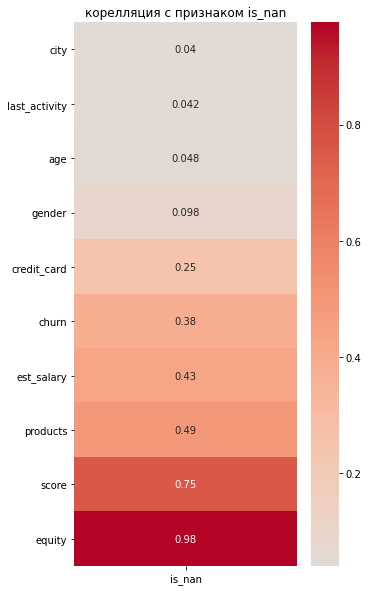

In [44]:

plt.figure(figsize=(5, 10));
sns.heatmap(data.phik_matrix(interval_cols=['age','score','balance','est_salary']).loc[:,['is_nan']].drop(['is_nan','userid','balance']).sort_values('is_nan'), annot=True,cmap='coolwarm',center=0);
plt.title('корелляция с признаком is_nan')
plt.show()    

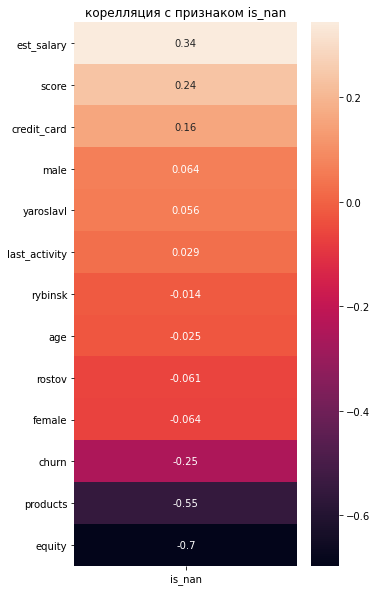

In [45]:
#Теперь воспользуемся ранговой корелляцией Спирмена
plt.figure(figsize=(5, 10));
sns.heatmap(dummy_data.corr(method='spearman').loc[:,['is_nan']].drop(['is_nan','userid','balance']).sort_values('is_nan', ascending=False),annot=True);
plt.title('корелляция с признаком is_nan')
plt.show()

Но для корелляции между категориальными переменных лучше использовать коэффициент ранговой корелляции Гудмена-Краскелла, с 
помощью которого также можно найти направление корелляции 

Корелляция также подтверждает предположения о зависимости пропусков в балансе от equity и products. Корелляция отрицательная, 
заметная (от 0,5 до 0,7)


Посмотрим на наличие выбросов и аномальных значений в непрерывных est_salary и balance и в дискретном с большим количеством 
значений score

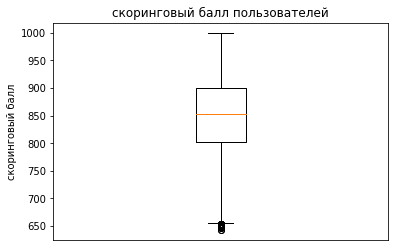

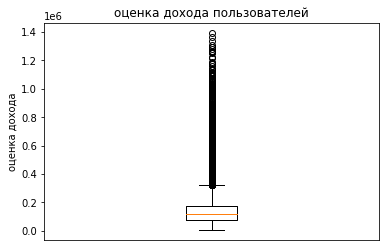

In [46]:

for i in [['score','скоринговый балл'],['est_salary','оценка дохода']]:
    ax=plt.axes()
    plt.boxplot(data[i[0]])
    plt.ylabel(f'{i[1]}')
    plt.title(f'{i[1]} пользователей')
    ax.axes.xaxis.set_visible(False)
    plt.show()

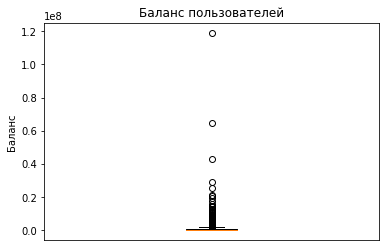

In [47]:
ax=plt.axes()
plt.boxplot(data.dropna()['balance']);
plt.ylabel('Баланс')
plt.title('Баланс пользователей')
ax.axes.xaxis.set_visible(False)

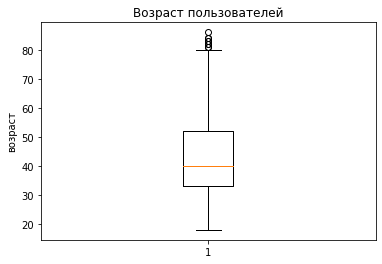

In [48]:

plt.boxplot(data.dropna()['age']);
plt.ylabel('возраст')
plt.title('Возраст пользователей')
ax.axes.xaxis.set_visible(False)

Таким образом, в полях balance и est_salary присутствует большое количество выбросов. Расчитаем верхнюю границу выбросов

In [49]:
q3, q1 = np.percentile (data['est_salary'], [75 ,25])
iqr = q3 - q1
salary_outliers=np.percentile (data['est_salary'], 75)+1.5*iqr

In [50]:
q3, q1 = np.percentile (data.dropna()['balance'], [75 ,25])
iqr = q3 - q1
balance_outliers=np.percentile (data.dropna()['balance'], 75)+1.5*iqr

In [51]:
salary_outliers


323374.625

In [52]:
balance_outliers

2006579.9649999999

Присутствуют выбросы в balance и est_salary. Стоит это иметь ввиду при дальнейшем анализе и при проверке гипотез


В результате предобработки была исследована структура данных и их целостность. Данные у пользователя без продуктов были удалены.
Также были исследованы и классифицированы (в зависимости от причины возникновения) пропуски в данных. Были обнаружены 
пользователи с одинаковыми userid, при этом данные пользователи различны. Таким образом, дубликатов и явных, и неявных 
обнаружено не было. Также была произведена кодировка категориальных признаков и исследование данных на наличие аномалий 
и выбросов

**Исследовательский анализ данных**

Составим портрет типичного пользователя

In [53]:
description = dummy_data.describe()


mean_and_median = description.loc[['mean', '50%']]
mean_and_median.index = ['mean', 'median']  

display(mean_and_median.round(2))

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male
mean,171817.11,848.69,42.73,2.63,827794.31,1.87,0.68,0.52,147879.17,0.18,0.23,0.14,0.27,0.59,0.5,0.5
median,172740.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119661.51,0.00,0.00,0.00,0.00,1.00,0.0,1.0


Визуализируем параметры клиентов в банке

In [54]:
xlabel_list=['пол','баллы собственности','город','кол-во исп. продуктов']
cat_col=['gender','equity','city','products']
cat_columns=zip(xlabel_list,cat_col)

In [55]:
zip_columns=list(cat_columns)

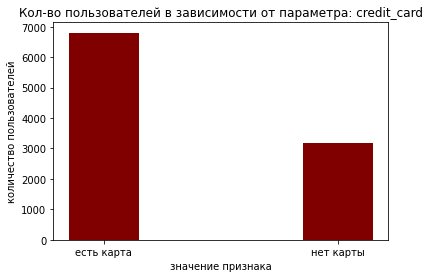

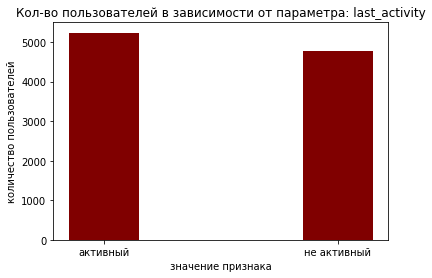

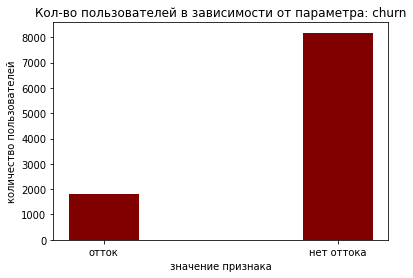

In [56]:
for i in [['credit_card','есть карта','нет карты'], ['last_activity','активный','не активный'], ['churn','отток','нет оттока']]:
    cc=data[i[0]].value_counts().reset_index()
    cc.columns=['type','count']
    plt.bar([i[1],i[2]],[int(cc.query('type==1')['count']),int(cc.query('type==0')['count'])], color ='maroon', 
        width = 0.3)
    plt.title(f'Кол-во пользователей в зависимости от параметра: {i[0]}')
    plt.xlabel('значение признака')
    plt.ylabel('количество пользователей')
    plt.show()


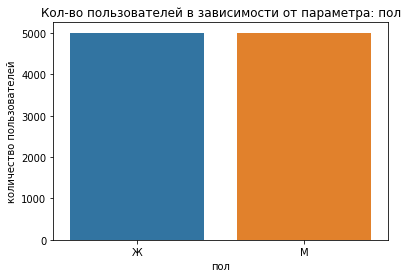

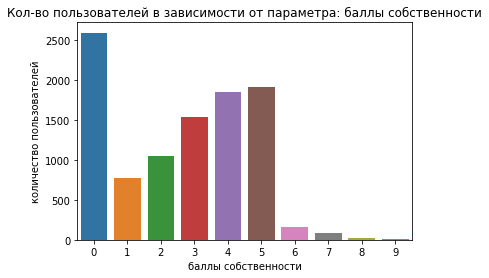

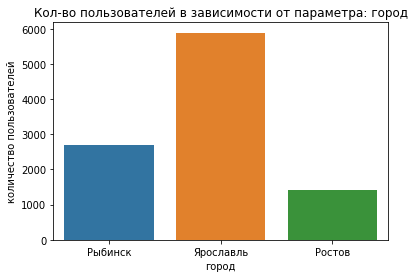

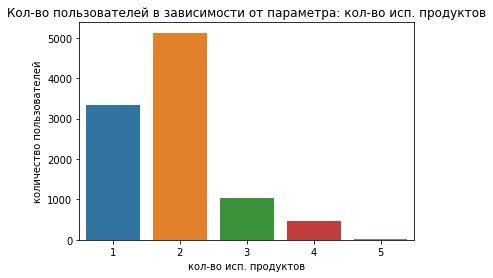

In [57]:

for i in zip_columns:
    sns.countplot(data=data,x=i[1])
    plt.title(f'Кол-во пользователей в зависимости от параметра: {i[0]}')
    plt.xlabel(i[0])
    plt.ylabel('количество пользователей')
    
    plt.show()
    

Теперь изучим количественные признаки

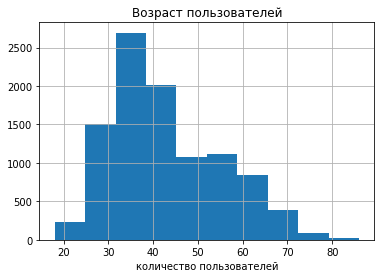

In [58]:
data['age'].hist();
plt.xlabel('возраст');
plt.xlabel('количество пользователей');
plt.title('Возраст пользователей');


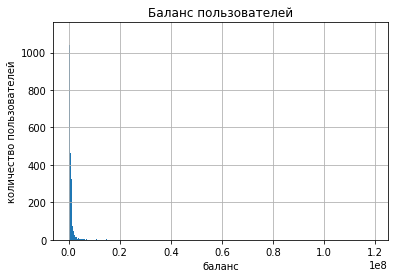

In [59]:
data['balance'].hist(bins=1000)
plt.xlabel('баланс');
plt.ylabel('количество пользователей');
plt.title('Баланс пользователей');

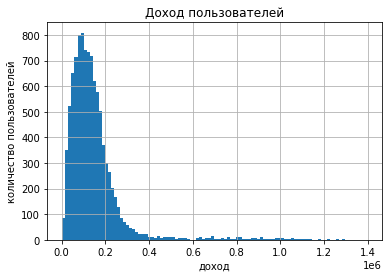

In [60]:
data['est_salary'].hist(bins=100)
plt.xlabel('доход');
plt.ylabel('количество пользователей');
plt.title('Доход пользователей');

Наблюдаются заметные выбросы, особенно в поле balance


    Оставим самых богатых пользователей и пока не будем чистить выбросы, но далее факт наличия выбросов следует иметь 
    ввиду при проверки статистических гипотез (так как t-test, например, более чувствителен к выбросам, чем его
                                               непараметрические аналоги)

Теперь разделим пользователей на отточных не отточных

In [64]:
data_churn=dummy_data.query('churn==1')

In [65]:
data_nochurn=dummy_data.query('churn==0')

In [66]:
data_churn.describe().round(2)

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male
count,1819.00,1819.00,1818.00,1819.00,1807.00,1819.00,1819.00,1819.00,1819.00,1819.0,1819.00,1819.00,1819.00,1819.00,1819.00,1819.00
mean,170975.06,863.35,41.43,3.76,1133993.27,2.38,0.55,0.70,148310.73,1.0,0.01,0.15,0.24,0.61,0.35,0.65
std,35295.15,49.57,11.14,1.59,2033978.25,0.92,0.50,0.46,122914.34,0.0,0.08,0.35,0.43,0.49,0.48,0.48
min,94561.00,706.00,18.00,0.00,6.00,1.00,0.00,0.00,10880.27,1.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,141300.00,828.00,32.00,3.00,387218.34,2.00,0.00,0.00,83196.61,1.0,0.00,0.00,0.00,0.00,0.00,0.00
50%,170532.00,866.00,39.00,4.00,782410.47,2.00,1.00,1.00,125395.22,1.0,0.00,0.00,0.00,1.00,0.00,1.00
75%,201399.50,898.00,52.00,5.00,1348101.46,3.00,1.00,1.00,175985.38,1.0,0.00,0.00,0.00,1.00,1.00,1.00
max,229058.00,1000.00,75.00,9.00,64866210.15,5.00,1.00,1.00,1263028.49,1.0,1.00,1.00,1.00,1.00,1.00,1.00


In [67]:
data_nochurn.describe().round(2)

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male
count,8180.00,8180.00,8155.00,8180.00,5.898000e+03,8180.00,8180.00,8180.00,8180.00,8180.0,8180.00,8180.00,8180.00,8180.00,8180.00,8180.00
mean,172004.36,845.43,43.02,2.37,7.339826e+05,1.76,0.71,0.48,147783.20,0.0,0.28,0.14,0.28,0.58,0.53,0.47
std,33345.47,68.05,12.38,1.97,1.954573e+06,0.71,0.45,0.50,142802.38,0.0,0.45,0.35,0.45,0.49,0.50,0.50
min,95384.00,642.00,18.00,0.00,0.000000e+00,1.00,0.00,0.00,2546.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,143105.50,796.00,34.00,0.00,2.793487e+05,1.00,0.00,0.00,73506.15,0.0,0.00,0.00,0.00,0.00,0.00,0.00
50%,173218.00,848.00,40.00,3.00,4.753824e+05,2.00,1.00,0.00,118257.72,0.0,0.00,0.00,0.00,1.00,1.00,0.00
75%,201260.25,900.00,51.00,4.00,8.539269e+05,2.00,1.00,1.00,173990.12,0.0,1.00,0.00,1.00,1.00,1.00,1.00
max,229145.00,1000.00,86.00,9.00,1.191136e+08,5.00,1.00,1.00,1395064.45,0.0,1.00,1.00,1.00,1.00,1.00,1.00


Составим портрет типичного отточного клиента

In [68]:

description_churn = data_churn.describe()
mean_median_churn = description_churn.loc[['mean', '50%']]
mean_median_churn.index = ['mean', 'median']  
display(mean_median_churn.round(2))

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male
mean,170975.06,863.35,41.43,3.76,1133993.27,2.38,0.55,0.7,148310.73,1.0,0.01,0.15,0.24,0.61,0.35,0.65
median,170532.00,866.00,39.00,4.00,782410.47,2.00,1.00,1.0,125395.22,1.0,0.00,0.00,0.00,1.00,0.00,1.00


Составим портрет типичного клиента, собирающегося остаться

In [69]:

description_nochurn = data_nochurn.describe()
mean_median_nochurn = description_nochurn.loc[['mean', '50%']]
mean_median_nochurn.index = ['mean', 'median']  
display(mean_median_nochurn.round(2))

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male
mean,172004.36,845.43,43.02,2.37,733982.59,1.76,0.71,0.48,147783.20,0.0,0.28,0.14,0.28,0.58,0.53,0.47
median,173218.00,848.00,40.00,3.00,475382.44,2.00,1.00,0.00,118257.72,0.0,0.00,0.00,0.00,1.00,1.00,0.00


Типичный отточный клиент имеет больше баллов собственности, пользуется большим количеством продуктов, реже имеет в наличие 
кредитную карту, является преимущественно активным пользователем и большинство отточных пользователей-мужчины

**Исследуем уровни оттока по категориям**

In [70]:
warnings.filterwarnings("ignore")


In [71]:
def cont_variables(data,feature,common_title,ltitle='клиент',title1='отточный',title2='остающийся'):
    g = sns.displot(data, x=feature, hue="churn", stat="density", common_norm=False)
    g.legend.set_title(ltitle)
    for label in g.legend.texts:
        if label.get_text() == '1':
            label.set_text(title1)
        else:
            label.set_text(title2)
    plt.title(f'Нормализованная гистограмма: {common_title}');   
    plt.show()

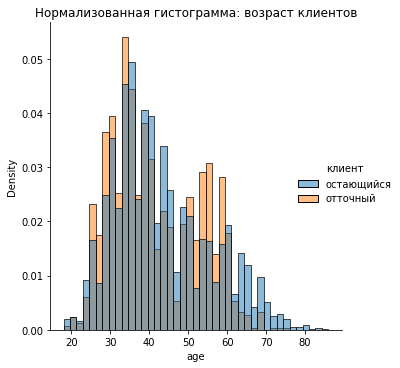

In [72]:
cont_variables(dummy_data,'age','возраст клиентов')

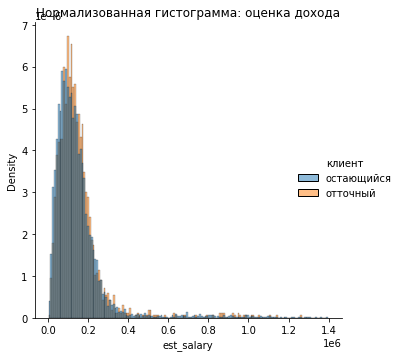

In [73]:
cont_variables(dummy_data,'est_salary','оценка дохода')

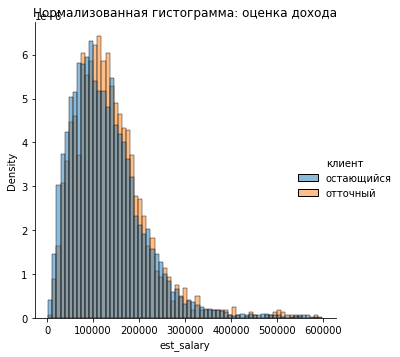

In [74]:
cont_variables(dummy_data[dummy_data['est_salary']<600000],'est_salary','оценка дохода')

Клиенты, получающие от 110000 до 220000 превалируют в плане оттока (при нормировании данных)

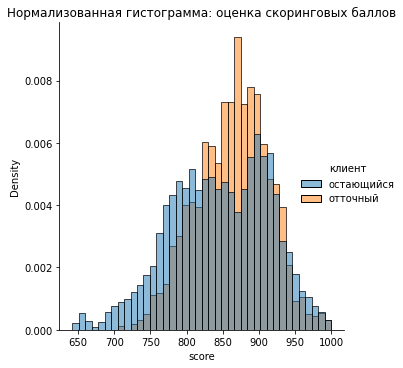

In [75]:
cont_variables(dummy_data,'score','оценка скоринговых баллов')

В качестве более склонного к оттоку сегмента выделяем пользователей, имеющих 820-920 баллов

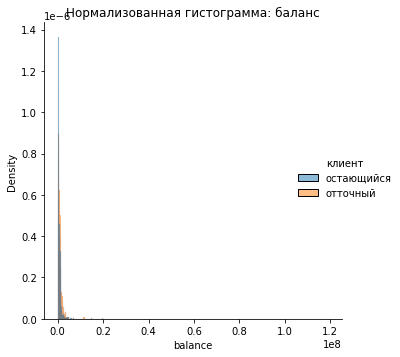

In [76]:
cont_variables(dummy_data,'balance','баланс')

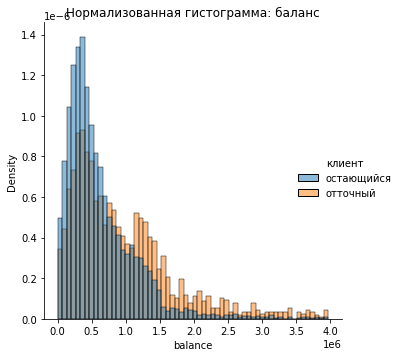

In [77]:
cont_variables(dummy_data[dummy_data['balance']<4000000],'balance','баланс')

Категория пользователей, склонная к оттоку (в относительном значении) имеет баланс свыше 800000

Среднее значение оттока по категориям категориальных признаков сравним со средним значением в банке

In [78]:
def category_mean(data,ind,cl):
    """сводная таблица уровня оттока по категориям
    data-данные
    ind - признак для группировки
    cl - название столбца признака в сводной таблице
        """
    churn_rate=data.pivot_table(index=ind,values='churn',aggfunc='mean').reset_index()
    churn_rate.columns=[cl,'mean_churn']
    return churn_rate
    

Протестируем работу функции

In [79]:
category_mean(dummy_data,'male','sex')

,sex,mean_churn
0,0,0.127353
1,1,0.236364


In [80]:
category_mean(dummy_data,'products','count_of_products')

,count_of_products,mean_churn
0,1,0.070338
1,2,0.190987
2,3,0.285852
3,4,0.632911
4,5,0.421053


Отдельно посмотрим на зависимость оттока от города

In [81]:
category_mean(dummy_data,'rybinsk','city')

,city,mean_churn
0,0,0.189322
1,1,0.161841


In [82]:
category_mean(dummy_data,'rostov','city')

,city,mean_churn
0,0,0.180960
1,1,0.187721


In [83]:
category_mean(dummy_data,'yaroslavl','city')

,city,mean_churn
0,0,0.170761
1,1,0.189708


По результатам сводных таблиц, зависимость уровня оттока от города не обнаружена. В каждом городе отток примерно на одном 
уровне и соответствует среднему оттоку среди всех клиентов

Визуализируем уровень оттока по категориям

In [84]:

def cat_features(data,ind,cl,category,p1='наличие признака',p2='отсутствие признака'):
    """функция для визуализации уровня оттока для категориальных признаков
    data-данные
    ind - признак(категория) для группировки
    cl - название столбца признака в сводной таблице
    category - название категории для подписи на графике"""
    churnrate=category_mean(data,ind,cl)

    data_dict={}
    churn_list=churnrate['mean_churn'].to_list()
    cat=churnrate[cl].to_list()
    for i in range(len(churn_list)):
        
        if len(cat)==2 and cat[i]==1:
            data_dict[f'{p1}']=churn_list[i]
        elif  len(cat)==2 and cat[i]==0:
            data_dict[f'{p2}']=churn_list[i]   
        else: 
            data_dict[f'{cat[i]}']=churn_list[i]  
            
    

    
    churnkeys = list(data_dict.keys())
    values = list(data_dict.values())
 
    fig = plt.figure(figsize = (10, 6))


    plt.bar(churnkeys, values, color ='maroon', 
        width = 0.3)

    plt.xlabel(f'{category}')
    plt.ylabel("доля оттока")
    plt.title(f"доля оттока по категории: {category}")

    plt.axhline(y=dummy_data['churn'].mean(), color="black", linestyle="--",label='средний отток по банку')
    plt.legend()
    plt.show()

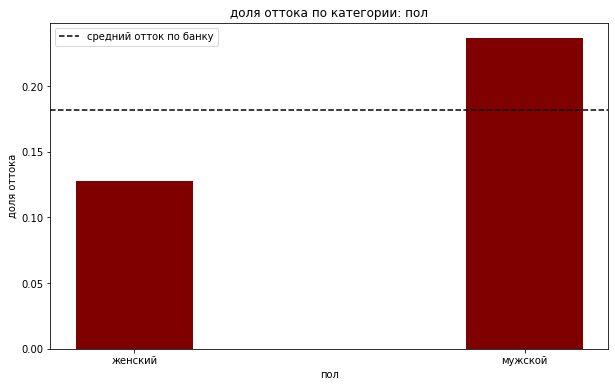

In [85]:
cat_features(dummy_data,'male','sex','пол','мужской','женский')

Доля оттока выше у мужчин

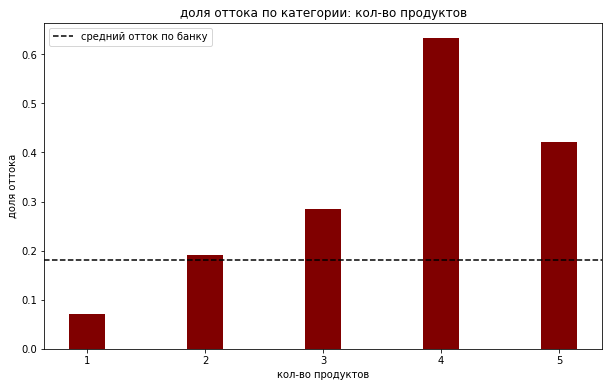

In [86]:
cat_features(dummy_data,'products','count_of_products', 'кол-во продуктов')

К оттоку более склонны клиенты, использующие более двух продуктов

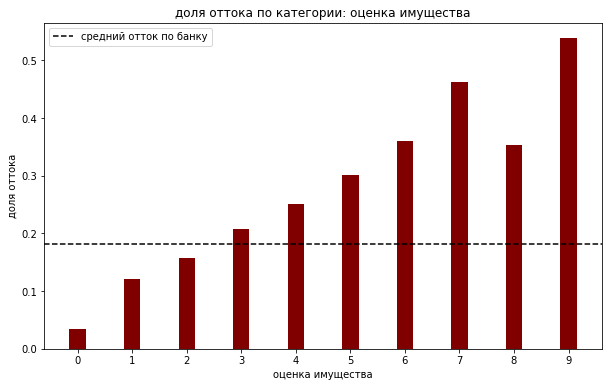

In [87]:
cat_features(dummy_data,'equity','count_of_equity', 'оценка имущества')

К оттоку более склонны пользователи имеющие оценку имущетсва >2

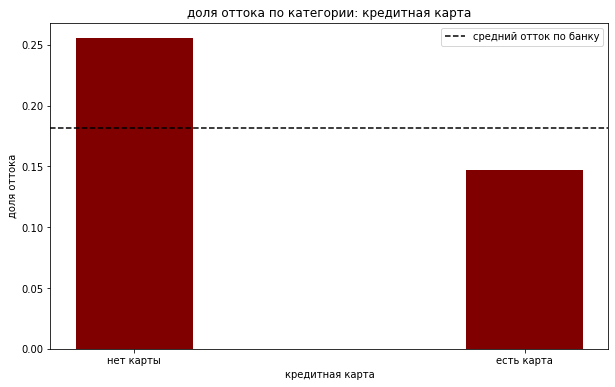

In [88]:
cat_features(dummy_data,'credit_card','credit_card', 'кредитная карта','есть карта','нет карты')

К оттоку более склонны пользователи без кредитной карты

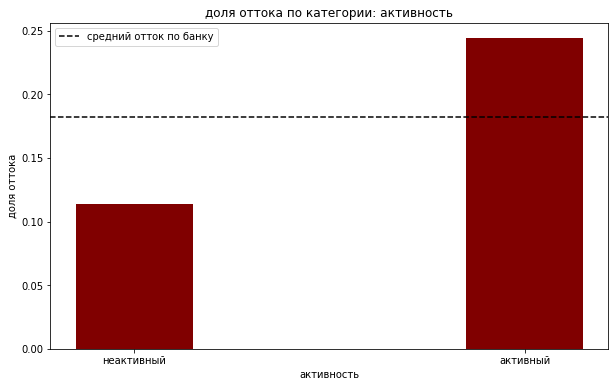

In [89]:
cat_features(dummy_data,'last_activity','last_activity', 'активность','активный','неактивный')

К оттоку более склонны пользователи с большей активностью

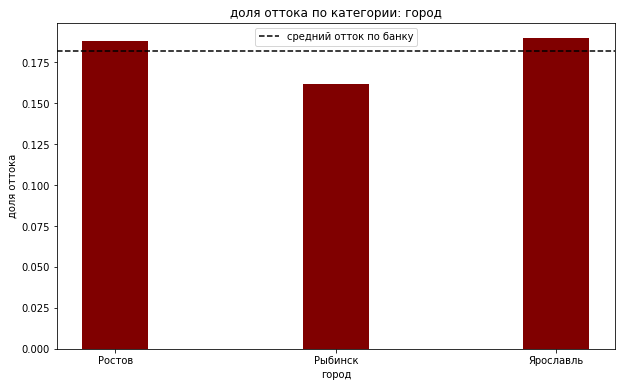

In [90]:
cat_features(data,'city','city', 'город')

Уровень оттока приблизительно находится на одном уровне для всех городов. Но для Ярославля и Ростова он чуть выше среднего, 
а для Рыбинска чуть ниже среднего. При этом, ввиду незначительного различия, судить об оттоке в зависимости от города 
не имеет смысла

Произведем корелляционный анализ

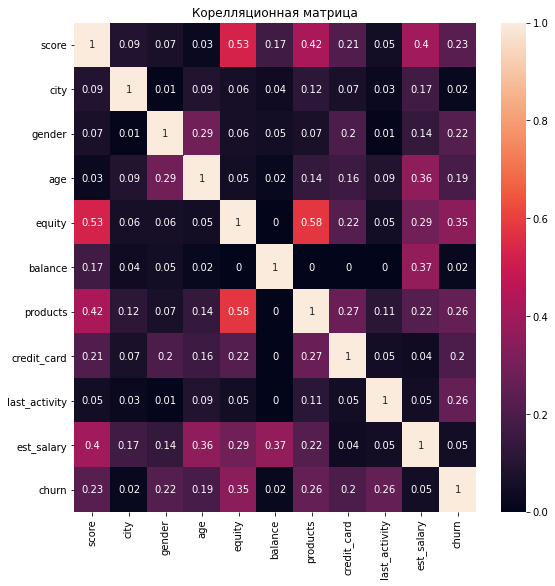

In [91]:
plt.figure(figsize=(9,9));
sns.heatmap(data.drop(columns=['userid','is_nan']).phik_matrix(interval_cols=['age','score','balance','est_salary']).round(2), annot=True);
plt.title('Корелляционная матрица');

Выделим в отдельный столбец признак churn

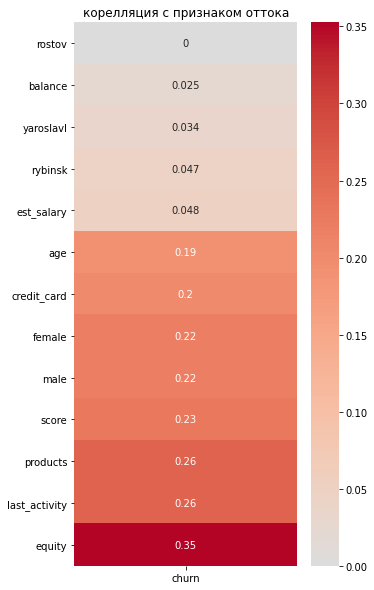

In [92]:
plt.figure(figsize=(5, 10));
sns.heatmap(dummy_data.phik_matrix(interval_cols=['age','score','balance','est_salary']).loc[:,['churn']].drop(['churn','userid','is_nan']).sort_values('churn'), annot=True,cmap='coolwarm',center=0);
plt.title('корелляция с признаком оттока')
plt.show()

Таким образом, корелляция оттока с каждым признаков по отдельности слабая. Самое высокое значение корелляции с наличием пропусков
 в balance (отрицательная) и с equity (положительная)

**Проверка статистических гипотез гипотез**

Проверим гипотезу о различии дохода между теми клиентами, которые
ушли и теми, которые остались.

In [93]:



churn_salary=data_churn.query('est_salary<=@salary_outliers')['est_salary']
nochurn_salary=data_nochurn.query('est_salary<=@salary_outliers')['est_salary']

In [94]:
churn_salary.var()

3947368359.546382

In [95]:
nochurn_salary.var()

4285109726.8891344

Проверим гипотезу о равенстве дисперсий. Далее используем полученный результат при проверке статистических гипотез

$\alpha=0.05$

$H_{0}: \sigma_{1}^{2}=\sigma_{2}^{2}$ (дисперсии равны)
    
$H_{1}: \sigma_{1}^{2}\neq\sigma_{2}^{2}$ (дисперсии не равны)

In [96]:

res,pval = stats.levene(churn_salary,nochurn_salary)


In [97]:
print(f'p_value={pval}')

p_value=0.015267882428394093


In [98]:
if (pval < 0.05):
    print("Отвергаем нулевую гипотезу, дисперсии не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу, дисперсии не равны


Проверим гипотезу различия дохода между теми клиентами, которые
ушли и теми, которые остались.

$H_{0}: \mu_{1}=\mu_{2}$ (средний доход оставшихся и отточных пользователей равен в г.c.)
    
$H_{1}: \mu_{1}\neq\mu_{2}$ (средний доход оставшихся и отточных пользователей не равен в г.c.)
    

Сначала воспользуемся t-тестом для проверки соответствующей гипотезы. Размер выборки достаточен для применимости ц.п.т., 
тогда из ее следствия о нормальности распределения выборочных средних, нормальность данных не является обязательным требованием в данном случае. Также в функцию передаем аргумент equal_var=False
, ввиду 
проверенной выше гипотезы о равенстве дисперсий. Как было отмечено ранее в поле est_salary наблюдается значительное количество 
выбросов, ввиду этого данный тест может давать неверный результат и следует воспользоваться его непараметрическим ранговым 
аналогом Манна-Уитни. В данный тест на вход подаются уже отфильтрованные данные, не 
содержащие выбросов. Далее проведем еще один t-тест с изначальными данными

In [99]:
alpha = 0.05 
results = stats.ttest_ind(
churn_salary,
nochurn_salary,equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.000108640026495106
Отвергаем нулевую гипотезу


Теперь воспользуемся тестом (Манна-Уитни), более устойчивым к выбросам. Также данный критерий лучше работает в случае 
небольшого размера выборки и ненормальности данных, но в данном случае размер выборки не противоречит условиям применимости и 
t-теста

In [100]:

alpha = 0.05 
results = stats.mannwhitneyu(
churn_salary,
nochurn_salary)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.81855740235503e-06
Отвергаем нулевую гипотезу


Таким образом, у нас есть  статистические основания отвергнуть нулевую гипотезу о равенстве дохода между теми клиентами, которые ушли и теми, которые остались
на уровне значимости 0.05 в пользу альтернативной гипотезы при отсутствии выбросах в данных

Теперь проведем t-тест с учетом изначальных данных

In [101]:

results = stats.ttest_ind(
data.loc[data['churn']==1]['est_salary'],
data.loc[data['churn']==0]['est_salary'],equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8724727072323815
Не получилось отвергнуть нулевую гипотезу


In [102]:
alpha = 0.05 
results = stats.mannwhitneyu(
data.loc[data['churn']==1]['est_salary'],
data.loc[data['churn']==0]['est_salary'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00021160652203623057
Отвергаем нулевую гипотезу


Таким образом, t-тест и тест Манна-Уитни при использовании изначальных данных показали разный результат.
 Стоит отметить, что в изначальных данных большое количество выбросов, что 
    могло повлиять на работу алгоритма. При наличие выбросов лучше использовать тест Манна-Уитни. Таким образом, есть статистические основания отвергнуть нулевую гипотезу о равенстве дохода между теми клиентами, которые у
шли и теми, которые остались на уровне значимости 0.05 в пользу альтернативной гипотезы

In [103]:
print(f'Средний доход отточных клиентов: {round(churn_salary.mean(),2)}')

Средний доход отточных клиентов: 128706.75


In [104]:
print(f'Средний доход неотточных клиентов: {round(nochurn_salary.mean(),2)}')

Средний доход неотточных клиентов: 122197.83


Проверим гипотезу о том, что пользователи, ушедшие в отток в среднем пользуются большим количеством продуктов

Для начала проверим гипотезу о равенстве дисперсий двух подгрупп

In [105]:
churn_products=data_churn['products']
nochurn_products=data_nochurn['products']

$\alpha=0.05$

$H_{0}: \sigma_{1}^{2}=\sigma_{2}^{2}$ (дисперсии равны)
    
$H_{1}: \sigma_{1}^{2}\neq\sigma_{2}^{2}$ (дисперсии не равны)


In [106]:
res,pval = stats.levene(churn_products,nochurn_products)
print(f'p_value={pval}')

p_value=1.50704682854377e-14


In [107]:
if (pval < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Проверим гипотезу об использовании большего числа продуктов  теми клиентами, которые
ушли, в отличие от тех, которые остались.

$H_{0}: \mu_{1}=\mu_{2}$ (средний кол-во используемых продуктов оставшихся и отточных пользователей равно в г.c.)
    
$H_{1}: \mu_{1}>\mu_{2}$ (в среднем отточные пользователи пользуются большем количеством продуктов чем те, которые собираются остаться)

Воспользуемся t-тестом для проверки соответствующей гипотезы. Размер выборки достаточен для применимости ц.п.т.,в данном случае нормальность данных не является обязательным требованием. Также в функцию передаем аргумент equal_var=False, ввиду проверенной выше гипотезы о равенстве дисперсий.

In [108]:
alpha = 0.05 
results = stats.ttest_ind(
churn_products,
nochurn_products,equal_var=False,alternative='greater')
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6206191687148455e-139
Отвергаем нулевую гипотезу


Таким образом, есть статистические основания отвергнуть нулевую гипотезу в пользу альтернативной: 
    в среднем отточные пользователи пользуются большем количеством продуктов чем те, которые собираются остаться


**Промежуточный итог**

На основании проведенного выше исследования можно выделить стратегические признаки, влияющие на отток

- пол: к оттоку более склонны мужчины, присутствует слабая корелляционная связь, стоит учитывать при сегментации
- возраст: клиенты, более склонные к оттоку, имеют возраст в основном от 25 до 40 и от 50 до 60, при сегментации 
    можно учитывать, но это не будет являться стратегическим показателем. Корелляционная связь слабая
- баллы собственности: к оттоку более склонны пользователи имеющие оценку имущетсва >2 (показатель оттока выше среднего).
    Данный критерий следует учитывать при сегментации пользователей, присутствует умеренная корелляционная зависимость
- скоринговый балл: в качестве более склонного к оттоку сегмента выделяем пользователей, имеющих 820-940 баллов
- город: связь оттока с городом не обнаружена, в каждом городе отток примерно равен среднему, корелляционной зависимости нет
- баланс: Корелляционная зависимость между балансом и оттоком отсутствует, при этом категория пользователей, склонная к оттоку (в относительном значении) имеет баланс свыше 800000.
    В данном случае объективнее рассматривать наблюдения по нормализованным данным. Таким образом для сегментации следует учитывать 
    пользователей с высоким балансом
- предполагаемый доход: строгой зависимости оттока от дохода нет, при этом клиенты, получающие от 110000 до 220000 превалируют в плане оттока (в относительном значении),
    далее, при увеличении дохода зависимости также нет. Данный интервал дохода можно учитывать при сегментации
- отсутствие данных о балансе: клиенты, имеющие незаполненный баланс в большей степени не отточны, присутствует 
    отрицательная корелляционная зависимость между пропусками и фактом оттока
- наличие кредитной карты: пользователи без кредитной карты более склонны к оттоку. Разница не очень большая, но при сегментации 
    можно учитывать вместе с другими факторами
- активность: пользователи с положительным показателем активности примерно в 2 раза больше склонны к оттоку, чем менее 
    активные пользователи. По результатам корелляционного анализа обнаружена слабая корелляционная связь. Стоит учитывать при сегментации
    

Воспользуемся различными методами машинного обучения с целью улучшения сегментации или подтверждения/корректировки основных отточных признаков

Для начала используем дерево решений для того, чтобы посмотреть, какие признаки чаще используются в алгоритме (при ветвлении) 
с целью уменьшения энтропии Шеннона $-\sum_{1}^{n} p_{i}log_{2}(p_{i})$

In [109]:
X=dummy_data.drop(columns=['churn','userid','balance'])
X['age']=X['age'].fillna(dummy_data['age'].median())
#X=dummy_data.drop(columns=['churn','userid'])
y=dummy_data['churn']



Разделим выборку и пронормируем данные (для последующих алгоритмов)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [111]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st =scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

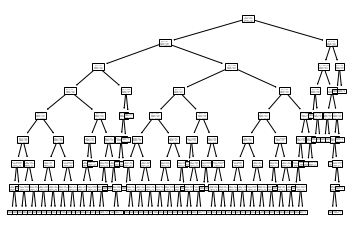

In [112]:

clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
parametrs = {'max_depth': range(2, 10,1), 'min_samples_split': range(1, 6), 'min_samples_leaf': range(1, 8,1)}
gs=GridSearchCV(clf,parametrs,scoring='roc_auc_ovr',cv=5,n_jobs=-1)
gs.fit(X_train,y_train)
best_forest=gs.best_estimator_
best_forest.fit(X_train,y_train)
tree.plot_tree(best_forest);

In [113]:
gs.best_params_

{'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [114]:
best_forest.feature_importances_

array([0.23634407, 0.11997525, 0.00286606, 0.12202984, 0.03207797,
       0.08822439, 0.07356298, 0.2279166 , 0.        , 0.02423066,
       0.        , 0.04984016, 0.022932  ])

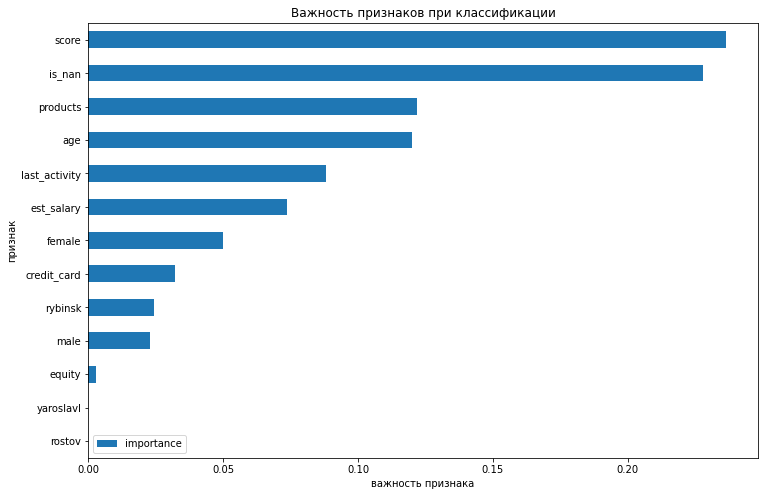

In [115]:
imp = pd.DataFrame(best_forest.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.xlabel('важность признака')
plt.ylabel('признак')
plt.title('Важность признаков при классификации')
plt.show()

На основе работы модели, топ-3 признака для разделения пользователей: score, is_nan, products

В данном случае пропуски (is_nan) присутствуют практически только у остающихся пользователей. А параметры score и products
особенно желательно использовать при сегментации

Далее воспользуемся методом понижения размерности для данных отточных пользователей. В данном случае используем метод 
t-distributed Stochastic Neighbor Embedding, с помощью которого при понижении размерности и дальнейшей визуализации 
можно увидеть кластеры данных (элементы выборки, имеющие схожие данные в пространстве более высокой размерности при 
                              понижении размерности с использованием данного метода оказываются также "близко" друг к другу, 
     так как в основе данного алгоритма лежит мера сходства Кульбка-Лейблера для распределений данных)

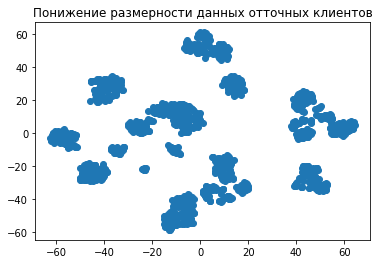

In [116]:
X_churn=data_churn.drop(columns=['userid','balance'])
X_churn['age']=X_churn['age'].fillna(data_churn['age'].median())
X_st = StandardScaler().fit_transform(X_churn)

XX=TSNE(n_components=2,init='random',random_state=0,n_jobs=-1).fit_transform(X_st)
plt.scatter(XX[:,0],XX[:,1]);
plt.title('Понижение размерности данных отточных клиентов');

В данном случае среди отточных клиентов не наблюдается нескольких больших ярко выраженных кластеров. При этом присутствует 
довольно много небольших. Для дальнейшего анализа, помимо сегментации пользоватлей  проведем
 кластеризацию, чтобы иметь возможность выделить неявные отточные признаки, не вошедшие в анализ по сегментации

In [117]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_churn)

Найдем оптимальные параметры для кластеризации

In [118]:
def find_best_dbscan_params(X, eps_value, min_samples_values):
    out=[]
    cnt=[]

    """функция при задании определенного параметра eps и списка с количеством соседних точек
    выводет количество кластеров и выбросов"""
    for min_samples in min_samples_values:

        dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)

        labels = dbscan.fit_predict(X)

        count_outliers=list(labels).count(-1)
        out.append(count_outliers)
        cnt.append(len(set(labels)))

    return   out,cnt            
                    

In [119]:
eps1,cnt1=find_best_dbscan_params(X_train_minmax, 0.1, list(range(1,7)))
eps2,cnt2=find_best_dbscan_params(X_train_minmax, 0.2, list(range(1,7)))
eps3,cnt3=find_best_dbscan_params(X_train_minmax, 0.3, list(range(1,7)))
eps4,cnt4=find_best_dbscan_params(X_train_minmax, 0.4, list(range(1,7)))

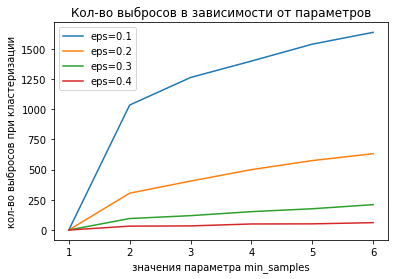

In [120]:
plt.plot(list(range(1,7)),eps1,label='eps=0.1')
plt.plot(list(range(1,7)),eps2,label='eps=0.2')
plt.plot(list(range(1,7)),eps3,label='eps=0.3')
plt.plot(list(range(1,7)),eps4,label='eps=0.4')
plt.legend();
plt.xlabel('значения параметра min_samples');
plt.ylabel('кол-во выбросов при кластеризации');
plt.title('Кол-во выбросов в зависимости от параметров');

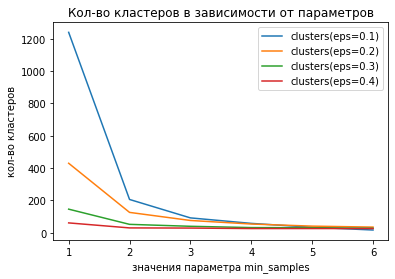

In [121]:
plt.plot(list(range(1,7)),cnt1,label='clusters(eps=0.1)')
plt.plot(list(range(1,7)),cnt2,label='clusters(eps=0.2)')
plt.plot(list(range(1,7)),cnt3,label='clusters(eps=0.3)')
plt.plot(list(range(1,7)),cnt4,label='clusters(eps=0.4)')
plt.legend()
plt.xlabel('значения параметра min_samples');
plt.ylabel('кол-во кластеров');
plt.title('Кол-во кластеров в зависимости от параметров');

Желательно, чтобы кластер, содержащий выбросы не был самым большим и на основе визуализации при понижении размерности выберем параметры, 
удовлетворяющие небольшому количеству выбросов и соответствующему количеству кластеров


In [122]:

clustering = DBSCAN(eps=0.4, min_samples=4).fit(X_train_minmax)
bdscan_lab=clustering.labels_

In [123]:
data_churn['lab']=bdscan_lab

In [124]:
cl_dict=dict(data_churn['lab'].value_counts())

In [125]:
#среди самых больших кластеров нет кластера с выбросами (label=-1)
list(cl_dict.items())[:6]

[(6, 289), (1, 189), (2, 157), (7, 153), (3, 142), (5, 116)]

In [126]:
key_val=[]
for i in list(cl_dict.items())[:6]:
    key_val.append(i[0])

In [127]:
for i in key_val:
    display(data_churn.query('lab==@i').describe().round(2))

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male,lab
count,289.00,289.00,289.00,289.00,289.00,289.00,289.0,289.0,289.00,289.0,289.0,289.0,289.0,289.0,289.0,289.0,289.0
mean,180065.43,861.51,37.72,3.79,1411315.75,2.35,1.0,1.0,166376.64,1.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
std,35150.97,49.60,9.75,1.56,4280389.25,1.10,0.0,0.0,166042.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,97604.00,706.00,19.00,0.00,42.00,1.00,1.0,1.0,15222.79,1.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
25%,151970.00,825.00,30.00,3.00,381106.00,2.00,1.0,1.0,80804.74,1.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
50%,180837.00,862.00,35.00,4.00,765522.09,2.00,1.0,1.0,129067.48,1.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
75%,212740.00,895.00,43.00,5.00,1213380.76,4.00,1.0,1.0,183692.25,1.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
max,228963.00,1000.00,66.00,9.00,64866210.15,5.00,1.0,1.0,1263028.49,1.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male,lab
count,189.00,189.00,189.00,189.00,189.00,189.00,189.0,189.0,189.00,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0
mean,164062.51,874.24,41.63,3.97,1162740.41,2.48,0.0,1.0,162134.97,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
std,35137.57,39.65,11.29,1.46,1243987.46,0.61,0.0,0.0,140424.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,96679.00,751.00,20.00,0.00,15017.21,1.00,0.0,1.0,25853.57,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
25%,132502.00,850.00,32.00,3.00,480412.49,2.00,0.0,1.0,95597.49,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
50%,167512.00,877.00,38.00,4.00,826452.56,2.00,0.0,1.0,135302.56,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
75%,191929.00,901.00,52.00,5.00,1395024.28,3.00,0.0,1.0,178898.57,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
max,226400.00,968.00,66.00,8.00,11331203.80,4.00,0.0,1.0,1142435.95,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male,lab
count,157.00,157.00,157.00,157.00,157.00,157.00,157.0,157.0,157.00,157.0,157.0,157.0,157.0,157.0,157.0,157.0,157.0
mean,176773.15,841.94,40.75,3.54,803260.91,2.44,1.0,0.0,129808.17,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
std,34242.44,50.27,10.34,1.60,833060.88,1.04,0.0,0.0,73633.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,102830.00,730.00,21.00,0.00,174.00,1.00,1.0,0.0,18068.10,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
25%,145232.00,805.00,33.00,3.00,278542.89,2.00,1.0,0.0,76166.91,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
50%,175541.00,836.00,39.00,4.00,497257.31,2.00,1.0,0.0,121971.25,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
75%,208779.00,879.00,48.00,5.00,1131557.21,3.00,1.0,0.0,174481.89,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
max,229005.00,986.00,69.00,7.00,6673219.33,4.00,1.0,0.0,504387.18,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male,lab
count,153.00,153.00,153.00,153.00,153.00,153.00,153.0,153.0,153.00,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0
mean,177951.69,877.67,42.06,4.40,1605482.87,2.56,0.0,1.0,186358.40,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0
std,35393.91,42.04,11.80,1.32,1826613.32,0.64,0.0,0.0,169511.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,108656.00,751.00,23.00,0.00,97038.10,2.00,0.0,1.0,28609.24,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0
25%,150383.00,851.00,32.00,4.00,779813.55,2.00,0.0,1.0,98134.05,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0
50%,174517.00,875.00,39.00,5.00,1231184.90,2.00,0.0,1.0,146986.65,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0
75%,210816.00,904.00,53.00,5.00,1821523.00,3.00,0.0,1.0,205662.57,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0
max,229058.00,993.00,72.00,9.00,15004496.45,4.00,0.0,1.0,1108269.91,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7.0


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male,lab
count,142.00,142.00,142.00,142.00,142.00,142.00,142.0,142.0,142.00,142.0,142.0,142.0,142.0,142.0,142.0,142.0,142.0
mean,165312.26,873.69,39.75,3.96,973221.57,2.49,1.0,1.0,140906.48,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
std,34253.94,42.15,10.55,1.47,785652.97,1.12,0.0,0.0,80564.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,100572.00,747.00,24.00,0.00,32629.76,1.00,1.0,1.0,16502.70,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
25%,136288.75,848.50,32.00,3.00,410636.42,2.00,1.0,1.0,95151.99,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
50%,162778.50,875.50,37.00,4.00,806606.59,2.00,1.0,1.0,127432.38,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
75%,194759.75,900.50,48.00,5.00,1272640.44,4.00,1.0,1.0,167622.22,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
max,226494.00,985.00,73.00,9.00,4554977.52,5.00,1.0,1.0,511838.23,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_nan,rostov,rybinsk,yaroslavl,female,male,lab
count,116.00,116.00,116.00,116.00,116.00,116.00,116.0,116.0,116.00,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0
mean,171707.64,858.09,39.11,3.58,872999.84,2.31,1.0,1.0,130730.67,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
std,31799.84,52.07,10.36,1.61,916549.89,1.06,0.0,0.0,65462.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,112641.00,733.00,22.00,0.00,46417.33,1.00,1.0,1.0,23688.97,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
25%,144369.50,817.75,32.00,3.00,305859.53,2.00,1.0,1.0,84370.28,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
50%,171790.00,865.00,37.00,4.00,598938.60,2.00,1.0,1.0,117984.80,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
75%,193945.00,896.25,46.00,5.00,1062509.06,3.00,1.0,1.0,163548.49,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
max,227140.00,978.00,68.00,8.00,6311217.60,4.00,1.0,1.0,392072.99,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0


Отметим, что большинство кластеров удовлетворяют наблюдениям из промежуточных итогов. Так, например, у большинства пользователей
в каждом кластере больше одного продукта, а показатель equity>=3. Среднее значение score тоже довольно высокое , в районе 850, 
а максимальный возраст меньше 70. Несмотря на то, что большинство наблюдений подтверждают полученные на прошлых этапах работы 
выводы, заметим, например, что несмотря на то, что клиенты имеющие кредитную карту менее склонны к оттоку, в 
в несколько отточных кластеров ( в том числе в самый крупный) входят клиенты, имеющие кредитную карту, при условии их 
активности и пользования несколькими продуктами. Также, несмотря на то, что мужчины склонну к оттоку в 2 раза чаще женщин, из 
4 самых больших отточных кластеров в двух абсолютно все пользователи $-$ женщины. 

Таким образом, на основании проведенных выше исследований можно сделать выводы, что такие отточные признаки, как, например, пол, 
наличие кредитной карты и баланс являются вторичными признаками оттока, по сравнению с количеством продуктов, score, активностью и
equity, что подтверждает каждый из крупных отточных кластеров и в большинстве показателей feature-importance у дерева решений

На основании проделанной работы во всех предыдущих пунктах выделим отточные сегменты 
(также при условии, чтобы данные отточные сегменты описывали определенную группу лиц по 
работе с которыми можно дать ) и приоритизируем их в порядке важности

**Сегментация**
Выделим 3-5 сегментов пользователей на основе указанных выше промежуточных выводов

Выделим отточные сегменты

In [128]:
mean_churn=dummy_data['churn'].mean()

In [129]:
mean_churn

0.18191819181918192

В первый отточный сегмент войдут мужчины с высоким показателем equity

In [130]:
s1=dummy_data.query('equity>=5 and male==1').agg({'churn':['mean','sum','count']}).round(2).reset_index()
s1.columns=['ф-ция агрегации','уровень оттока']
s1_churn=s1['уровень оттока'][0]
print(f'В данном сегменте уровень оттока выше среднего по банку в {round(s1_churn/mean_churn,2)} раза')

В данном сегменте уровень оттока выше среднего по банку в 2.25 раза


In [131]:
display(s1)

,ф-ция агрегации,уровень оттока
0,mean,0.41
1,sum,464.00
2,count,1123.00


Сегмент среднего размера, отточный

Во второй отточный сегмент войдут активные пользователи с большим количеством продуктов

In [132]:

s2=dummy_data.query('products>=3 and last_activity==1').agg({'churn':['mean','sum','count']}).round(2).reset_index()
s2.columns=['ф-ция агрегации','уровень оттока']
s2_churn=s2['уровень оттока'][0]
print(f'В данном сегменте уровень оттока выше среднего по банку в {round(s2_churn/mean_churn,2)} раза')

В данном сегменте уровень оттока выше среднего по банку в 2.58 раза


In [133]:
display(s2)

,ф-ция агрегации,уровень оттока
0,mean,0.47
1,sum,391.00
2,count,824.00


Сегмент среднего размера, отточный

В третий отточный сегмент войдут пользователи  с большим значением скоринговых баллов (845+) и большим 
балансом (balance>1000000)

In [134]:
#!
s3=dummy_data.query('score>845 and balance>1000000').agg({'churn':['mean','sum','count']}).round(2).reset_index()
s3.columns=['ф-ция агрегации','уровень оттока']
s3_churn=s3['уровень оттока'][0]
print(f'В данном сегменте уровень оттока выше среднего по банку в {round(s3_churn/mean_churn,2)} раза')

В данном сегменте уровень оттока выше среднего по банку в 2.47 раза


In [135]:
display(s3)

,ф-ция агрегации,уровень оттока
0,mean,0.45
1,sum,606.00
2,count,1342.00


Сегмент среднего размера, отточный 

Выделим в отдельный сегмент пользователей которые имеют кредитную карту (хотя обычно среди
                                                                          таких пользователей отток меньше), при этом являются активными пользователями 
и пользутся большим количеством продуктов. Получим небольшой сегмент с сильным уровнем оттока

In [136]:
s4=dummy_data.query('products>2 and credit_card==1 and last_activity==1').agg({'churn':['mean','sum','count']}).round(2).reset_index()
s4.columns=['ф-ция агрегации','уровень оттока']
s4_churn=s4['уровень оттока'][0]
print(f'В данном сегменте уровень оттока выше среднего по банку в {round(s4_churn/mean_churn,2)} раза')

В данном сегменте уровень оттока выше среднего по банку в 2.97 раза


In [137]:
display(s4)

,ф-ция агрегации,уровень оттока
0,mean,0.54
1,sum,208.00
2,count,385.00


Маленький сегмент, сильно отточный

Приоритизируем полученные сегменты по приоритетности удержания клиентов:
    
- 1) активные пользователи с большим количеством продуктов (для банка это самые важные клиенты, их следует удерживать в первую очередь)


- 2) пользователи с большим балансом и высокими скоринговыми баллами (данные клиенты также важны банку, так как являются 
    надежными клиентами, ввиду высокой оценки скоринговых баллов и помимо этого являются платежеспособными клиентыми, имеют 
                                                                     возможность открыть депозит и внести большую сумму)
- 3) мужчины с высоким значением оценочной собственности (среди мужчин отток примерно в 2 раза выше, чем среди женщин.
                                                          Также к оттоку склонны люди с большим показателем equity. Таким 
                                                         образом на основе указанных отточных характеристик выделяем 
                                                         полноценный сегмент)
- 4) активные пользователи при наличие кредитной карты (несмотря на то, что клиенты с кредитной картой менее склонны к оттоку, 
        сегмент активных пользователей, которые используют более одного продукта и при этом обладают кредитной картой
                                                        является сильно отточным, тогд как пользователи без кредитной 
                                                       карты, но с теми же условиями, являются гораздо менее отточными)

**Вывод**

В рамках проделанной работы были исследованы характеристики клиентов банка. Был произведен исследовательсикй анализ данных, 
куда также входил корелляционный анализ, а также проверка гипотез и использование различных ml средств. В рамках работы 
были отмечены признаки и/или их интервальные значения, наиболее влияющие на отток, а также выделены сегменты пользователей, 
склонных к оттоку, в порядке приоритета для работы с отточным сегментом

Основные рекомендации по удержанию отточных сегментов

  
1) Активные пользователи с большим количеством продуктов: данные пользователи могут быть склонны к оттоку, поскольку им скорее всего 
    не хватает в этих продуктах того, что есть у конкурентов. Данные клиенты, ввиду своей активности и большого 
    количества используемых продуктов очень важны банку. Для их удержания, в случае невозможности улучшения в ближайшее время 
    продуктов, следует предоставить различные скидки и льготы, как постоянным клиентам. То есть следует предложить 
    более выгодные условия пользования продуктами, чем в других банках, чтобы это мотивировало их остаться. К таким клиентам 
    желателен индивидуальный подход
    
2) Пользователи с большим значением скоринговых баллов  и большим балансом (balance>1000000):  данные надежные клиенты также 
    важны банку. Ввиду большого значения скоринговых баллов таким клиентам, возможно следует упростить получение кредита или 
    заметно увеличить лимит кредитной карты при ее наличие. Ввиду наличия большого баланса таким клиентам следует немного 
    увеличть %  по вкладам (например, при внесении определенной суммы, свыше n руб.) Данное решение будет мотивировать клиентов 
    остаться и продолжить пользоваться услугами банка
    
3) Мужчины с высоким значением оценочной собственности: с данным сегментом банку также важно работать в связи с высокой отточностью.
    Возможно, следует заключить договор с некоторыми компаниями, продающими в основном мужские товары, чтобы при оплате 
    товаров по карте банка начислялся cashback или заключить другие различные партнерские соглашения. А также, поскольку клиенты данного сегмента имеют много собственности, 
    банку стоит консультировать клиентов по управлению активами, оказывать различные консалтинговые услуги
    
    
4) Активные пользователи при наличие кредитной карты: данные сегмент небольшой, но сильно отточный. Ввиду своей 
    активности клиентам следует предоставить некоторые льготы, особенно касающиеся используемых продуктов и кредитной карты.
    Например, увеличить лимит на кредитной карте и предоставить скидки постоянным клиентам при использовании некоторых 
    популярных продуктов
  